In [1]:
%autosave 0
%matplotlib inline

Autosave disabled


In [54]:
sys.path.append("/home/app/src/lib/")
from faces import *

In [55]:
INPUT_IMAGE_DIR = "/src/input/JPEG_Convert_Resolution_1024"
FACES_IMAGE_DIR = INPUT_IMAGE_DIR + "/faces"
OPENCV_DIR = "/usr/local/share/OpenCV"
OPENCV_FACE_CASCADE = OPENCV_DIR + '/haarcascades/haarcascade_frontalface_default.xml'
OPENCV_EYE_CASCADE = OPENCV_DIR + '/haarcascades/haarcascade_eye.xml'
RESET_FILES_FLAG = True
SHOW_IMAGES_FLAG = False
LIST_FILES_FLAG = False
INPUT_SAMPLE_SIZE = 100

In [57]:
INPUT_IMAGE_FILES = list(map(lambda x: INPUT_IMAGE_DIR + "/" + x, os.listdir(INPUT_IMAGE_DIR)))
make_directory(FACES_IMAGE_DIR)

In [58]:
#Temporary Variables - for testing
TEST_IMAGE_SHORT = "slwa_b1851997_5_master.jpg"
TEST_IMAGE_FULL = INPUT_IMAGE_DIR + "/" + TEST_IMAGE_SHORT

try: INPUT_IMAGE_FILES_SAMPLE = random.sample(INPUT_IMAGE_FILES, INPUT_SAMPLE_SIZE)
except: pass
if LIST_FILES_FLAG: print(INPUT_IMAGE_FILES_SAMPLE)

In [59]:

def find_faces(image_file, show=SHOW_IMAGES_FLAG):
    img_bgr = cv2.imread(image_file) #Loads into BGR color space by default
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #convert img to RGB 
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) #Converts into grayscale for face detection
    img_gray_eq = cv2.equalizeHist(img_gray) #Normalizes histogram of contrast
    
    face_cascade = cv2.CascadeClassifier(OPENCV_FACE_CASCADE)
    faces = face_cascade.detectMultiScale(img_gray_eq, scaleFactor=1.2, minNeighbors=5, minSize=(30,30))
    for (x,y,w,h) in faces:
        save_face(image_file, img_bgr[y:(y+h), x:(x+w)])
        if show: cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),2)
    
    if show: show_image(img_rgb)

    return faces

faces = [find_faces(image_file) for image_file in INPUT_IMAGE_FILES_SAMPLE]
if LIST_FILES_FLAG: print(os.listdir(FACES_IMAGE_DIR))

In [18]:
TEST_FILE_PATH = "/home/app/data/input/images/JPEG_Convert_Resolution_1024/slwa_b1921885_2_master.jpg"
#TEST_FILE_PATH = "/home/app/data/input/images/JPEG_Convert_Resolution_1024/slwa_b1921405_11_master.jpg"
#PREDICTOR_PATH = "/home/app/data/input/classifier/shape_predictor_5_face_landmarks.dat"
PREDICTOR_PATH = "/home/app/data/input/classifier/shape_predictor_68_face_landmarks.dat"

In [19]:
import sys; sys.path.append("/home/app/src/lib/")
from matplotlib import pyplot as plt
import dlib
import cv2
import numpy as np
import ext.align as openface

In [20]:
align = openface.AlignDlib(PREDICTOR_PATH)

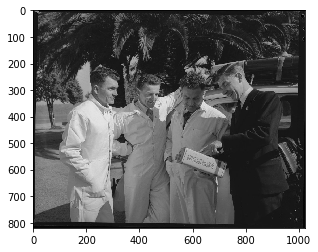

In [21]:
bgrImg = cv2.imread(TEST_FILE_PATH)
rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)

In [22]:
bb = align.getLargestFaceBoundingBox(rgbImg)
print(bb)

[(255, 265) (344, 355)]


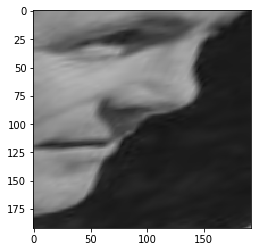

In [24]:
alignedFace = align.align(192, rgbImg, bb, landmarkIndices = openface.AlignDlib.OUTER_EYES_AND_NOSE)
plt.imshow(alignedFace)

In [2]:


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)
predictor = dlib.shape_predictor(PREDICTOR_PATH)


bgr_img = cv2.imread(TEST_FILE_PATH)
if bgr_img is None:
    print("Sorry, we could not load '{}' as an image".format(TEST_FILE_PATH))
    exit()

# Convert to RGB since dlib uses RGB images
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# Ask the detector to find the bounding boxes of each face. The 1 in the
# second argument indicates that we should upsample the image 1 time. This
# will make everything bigger and allow us to detect more faces.
dets = detector(img, 1)

num_faces = len(dets)
if num_faces == 0:
    print("Sorry, there were no faces found in '{}'".format(TEST_FILE_PATH))
    exit()

# Find the 5 face landmarks we need to do the alignment.
faces = dlib.full_object_detections()
for detection in dets:
    faces.append(sp(img, detection))

    
# Get the aligned face images
# Optionally: 
# images = dlib.get_face_chips(img, faces, size=160, padding=0.25)
images = dlib.get_face_chips(img, faces, size=320)
for image in images:
    cv_bgr_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imshow('image',cv_bgr_img)
    cv2.waitKey(0)

# It is also possible to get a single chip
image = dlib.get_face_chip(img, faces[0])
cv_bgr_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.imshow('image',cv_bgr_img)
cv2.waitKey(0)

cv2.destroyAllWindows()


AttributeError: module 'dlib' has no attribute 'extract_face_chips'